In [22]:
#Author: ALEJANDRO CORROCHANO
#Group 12

import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import lognorm
import statistics

In [23]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = df[df.columns[:12]]
y = df['DEATH_EVENT']
#We choose 3 variables to display the Q-Q plot
qq_variables = ['ejection_fraction', 'platelets', 'age', 'serum_creatinine']

In [24]:
#We reserve 20% of the data for the TEST set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=97)

# #We reserve another 10% of the data for the VALIDATION set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.11)

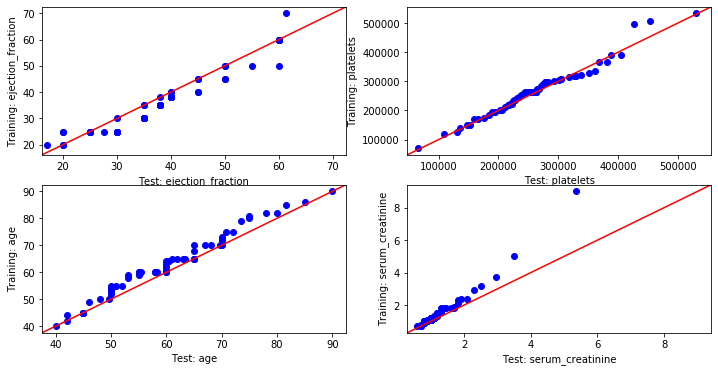

In [25]:
from statsmodels.graphics.gofplots import qqplot_2samples

aux = [(0,0),(0,1),(1,0),(1,1)]

fig, axs = plt.subplots(2,2, figsize =(12,6))
for ind, i in enumerate(qq_variables): 
    qqplot_2samples(X_test[i], X_train[i], xlabel = "Test: "+str(i), ylabel = "Training: "+str(i), line= "45", ax = axs[aux[ind]] )
plt.show()    

In [26]:
temp_df = pd.concat([X_train, y_train], axis = 1)

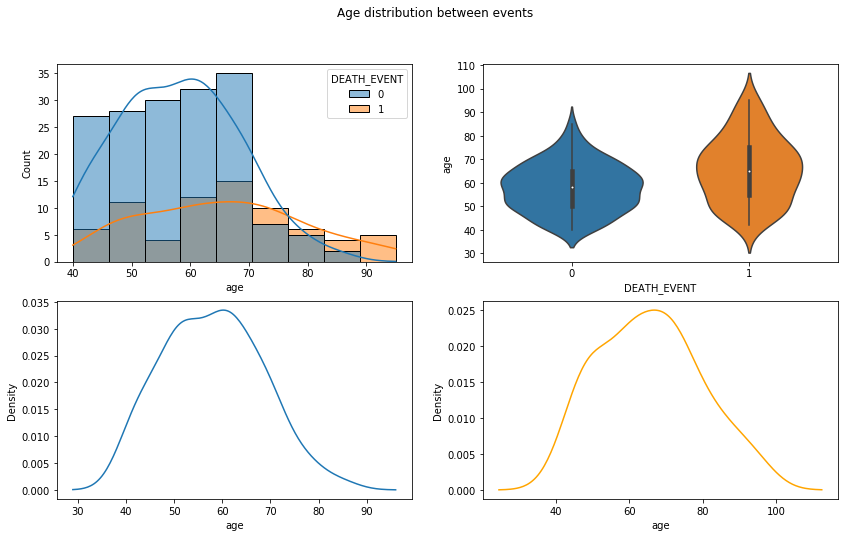

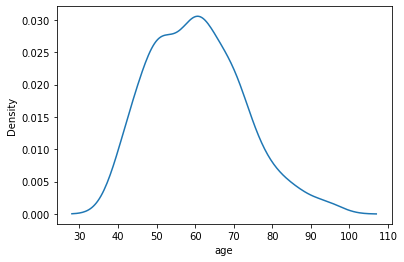

KstestResult(statistic=0.07581551369512812, pvalue=0.12172866939842686)


In [27]:
#AGE

fig,axs = plt.subplots(2,2, figsize = (14,8))

sns.histplot(temp_df, x='age', hue='DEATH_EVENT',kde = True, ax =axs[0,0]) 
plt.suptitle("Age distribution between events")
sns.violinplot(data = temp_df, x="DEATH_EVENT", y="age", ax = axs[0,1])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 0], x= 'age', ax= axs[1,0])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 1], x= 'age', ax= axs[1,1], color = 'orange')
plt.show()

# print("Survivors", round(temp_df[temp_df['DEATH_EVENT'] == 0]['age'].describe(),2))
# print()
# print("Deceases", round(temp_df[temp_df['DEATH_EVENT'] == 1]['age'].describe(),2))

sns.kdeplot(data = temp_df['age'])
plt.show()

print(kstest(temp_df['age'],'norm', args =(temp_df['age'].mean(), temp_df['age'].std())))

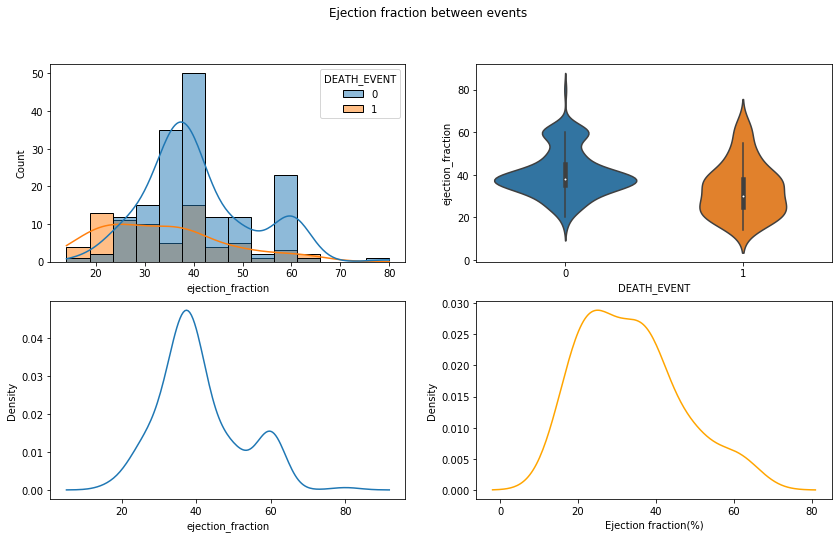

KstestResult(statistic=0.17384399093614067, pvalue=8.700322960263527e-07)


In [28]:
#EJECTION FRACTION

fig,axs = plt.subplots(2,2, figsize = (14,8))

sns.histplot(temp_df, x='ejection_fraction', hue='DEATH_EVENT',kde = True, ax = axs[0,0]) 
plt.xlabel("Ejection fraction(%)")
plt.suptitle("Ejection fraction between events")
#print(np.histogram(temp_df['ejection_fraction']))
sns.violinplot(data = temp_df, x="DEATH_EVENT", y="ejection_fraction", ax = axs[0,1])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 0], x= 'ejection_fraction', ax= axs[1,0])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 1], x= 'ejection_fraction', ax= axs[1,1], color = 'orange')
plt.show()

print(kstest(temp_df['ejection_fraction'],'norm', args =(temp_df['ejection_fraction'].mean(), temp_df['ejection_fraction'].std())))
# print("Survivors", round(temp_df[temp_df['DEATH_EVENT'] == 0]['ejection_fraction'].describe(),2))
# print()
# print("Deceases", round(temp_df[temp_df['DEATH_EVENT'] == 1]['ejection_fraction'].describe(),2))

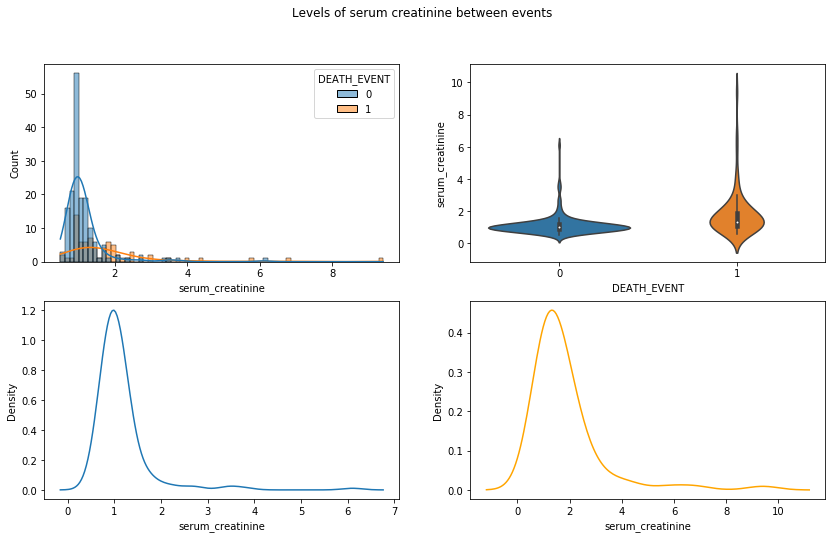

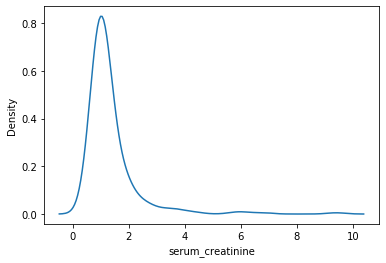

KstestResult(statistic=0.12443585196601714, pvalue=0.001102251361019695)


In [29]:
#SERUM CREATININE

fig,axs = plt.subplots(2,2, figsize = (14,8))

sns.histplot(temp_df, x='serum_creatinine', hue='DEATH_EVENT', kde = True, ax=axs[0,0]) 
sns.violinplot(data = temp_df, x="DEATH_EVENT", y="serum_creatinine", ax = axs[0,1])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 0], x= 'serum_creatinine', ax= axs[1,0])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 1], x= 'serum_creatinine', ax= axs[1,1], color = 'orange')
plt.suptitle("Levels of serum creatinine between events")
plt.show()

sns.kdeplot(data = temp_df['serum_creatinine'])
plt.show()

alpha = (temp_df['serum_creatinine'].mean()**2)/(temp_df['serum_creatinine'].std()**2)

#print(kstest(temp_df['serum_creatinine'],'t', args =(temp_df['serum_creatinine'].mean(), temp_df['serum_creatinine'].std())))
print(kstest(temp_df['serum_creatinine'],'lognorm', lognorm.fit(temp_df['serum_creatinine'])))

# print("Survivors", round(temp_df[temp_df['DEATH_EVENT'] == 0]['serum_creatinine'].describe(),2))
# print()
# print("Deceases", round(temp_df[temp_df['DEATH_EVENT'] == 1]['serum_creatinine'].describe(),2))

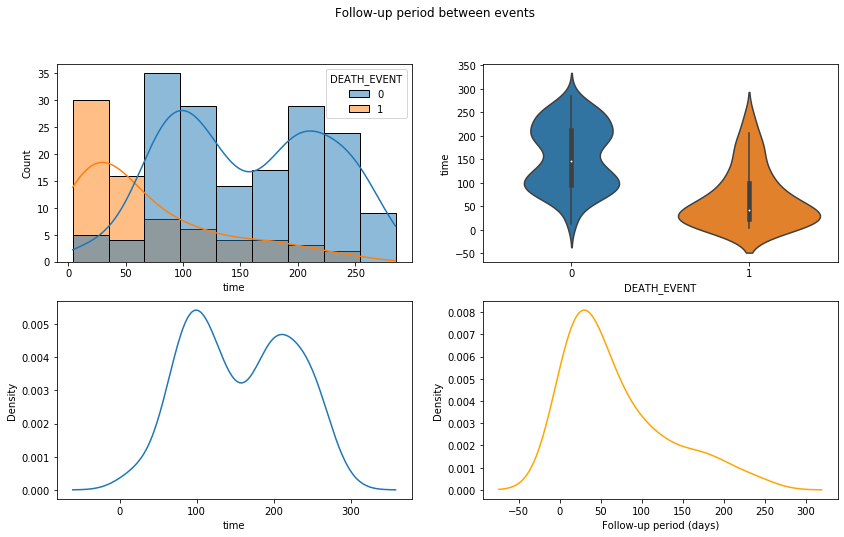

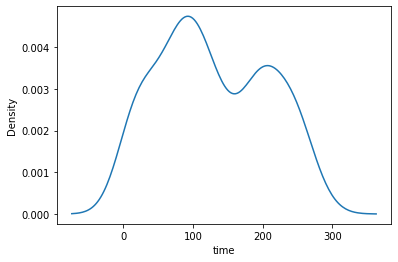

KstestResult(statistic=0.09800108599403301, pvalue=0.018897533065009943)


In [30]:
#FOLLOW-UP PERIOD 

fig,axs = plt.subplots(2,2, figsize = (14,8))

sns.histplot(temp_df, x='time', hue='DEATH_EVENT', kde = True, ax=axs[0,0]) 
plt.xlabel("Follow-up period (days)")
plt.suptitle("Follow-up period between events")
sns.violinplot(data = temp_df, x="DEATH_EVENT", y="time", ax = axs[0,1])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 0], x= 'time', ax= axs[1,0])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 1], x= 'time', ax= axs[1,1], color = 'orange')
plt.show()

sns.kdeplot(data = temp_df['time'])
plt.show()

# print("Survivors", round(temp_df[temp_df['DEATH_EVENT'] == 0]['time'].describe(),2))
# print()
# print("Deceases", round(temp_df[temp_df['DEATH_EVENT'] == 1]['time'].describe(),2))

print(kstest(temp_df['time'],'norm', args =(temp_df['time'].mean(), temp_df['time'].std())))

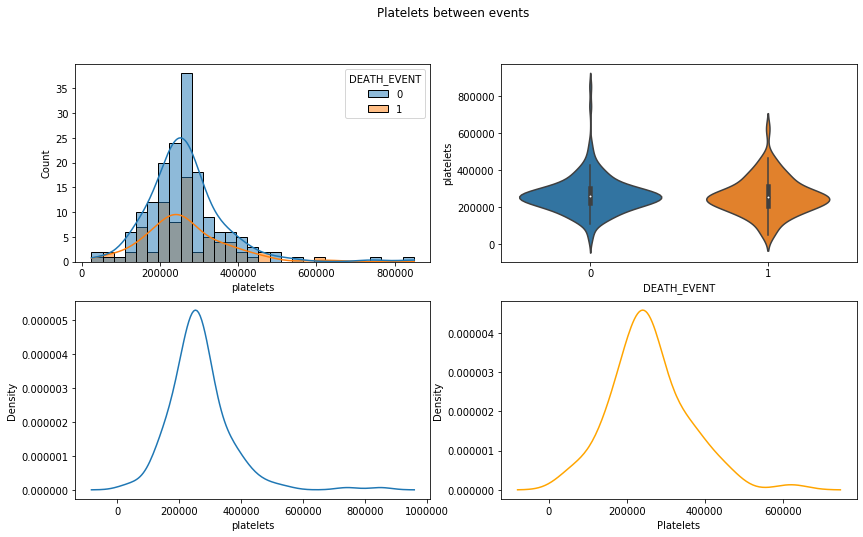

KstestResult(statistic=0.12821686108625618, pvalue=0.0006944211118939683)
Survivors count       166.00
mean     265177.09
std      101064.10
min       25100.00
25%      218000.00
50%      258500.00
75%      301750.00
max      850000.00
Name: platelets, dtype: float64

Deceases count        73.00
mean     257869.95
std       99264.99
min       47000.00
25%      204000.00
50%      254000.00
75%      310000.00
max      621000.00
Name: platelets, dtype: float64


In [31]:
#PLATELETS

fig,axs = plt.subplots(2,2, figsize = (14,8))

sns.histplot(temp_df, x='platelets', hue='DEATH_EVENT', kde = True,ax = axs[0,0]) 
plt.xlabel("Platelets")
plt.suptitle("Platelets between events")
sns.violinplot(data = temp_df, x="DEATH_EVENT", y="platelets", ax = axs[0,1])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 0], x= 'platelets', ax= axs[1,0])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 1], x= 'platelets', ax= axs[1,1], color = 'orange')
plt.show()

print(kstest(temp_df['platelets'],'norm', args =(temp_df['platelets'].mean(), temp_df['platelets'].std())))

print("Survivors", round(temp_df[temp_df['DEATH_EVENT'] == 0]['platelets'].describe(),2))
print()
print("Deceases", round(temp_df[temp_df['DEATH_EVENT'] == 1]['platelets'].describe(),2))

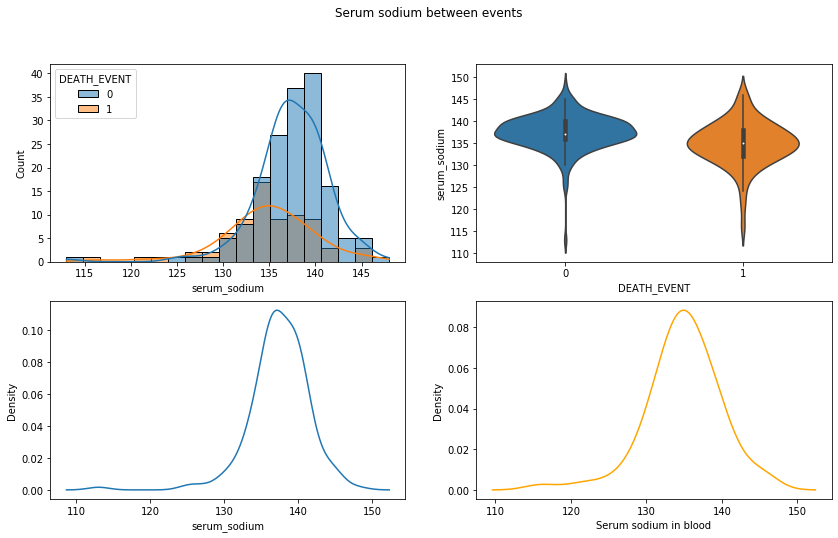

Survivors count    166.00
mean     137.45
std        4.03
min      113.00
25%      136.00
50%      137.00
75%      140.00
max      148.00
Name: serum_sodium, dtype: float64

Deceases count     73.00
mean     134.86
std        5.02
min      116.00
25%      132.00
50%      135.00
75%      138.00
max      146.00
Name: serum_sodium, dtype: float64


In [32]:
#SERUM SODIUM

fig,axs = plt.subplots(2,2, figsize = (14,8))

sns.histplot(temp_df, x='serum_sodium', hue='DEATH_EVENT', kde = True,ax = axs[0,0]) 
plt.xlabel("Serum sodium in blood")
plt.suptitle("Serum sodium between events")
sns.violinplot(data = temp_df, x="DEATH_EVENT", y="serum_sodium", ax = axs[0,1])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 0], x= 'serum_sodium', ax= axs[1,0])
sns.kdeplot(data = temp_df[temp_df['DEATH_EVENT'] == 1], x= 'serum_sodium', ax= axs[1,1], color = 'orange')
plt.show()
print("Survivors", round(temp_df[temp_df['DEATH_EVENT'] == 0]['serum_sodium'].describe(),2))
print()
print("Deceases", round(temp_df[temp_df['DEATH_EVENT'] == 1]['serum_sodium'].describe(),2))

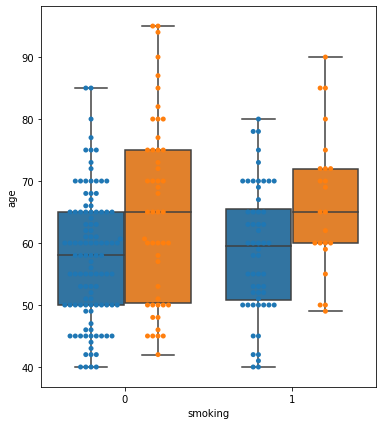

In [33]:
#AGE VS SMOKING
fig,ax = plt.subplots(figsize = (6,7))
sns.boxplot(data = temp_df, x = 'smoking', y='age', hue="DEATH_EVENT")
sns.swarmplot(data = temp_df, x = 'smoking', y='age', hue="DEATH_EVENT", dodge= True)

ax.get_legend().remove()

plt.show()

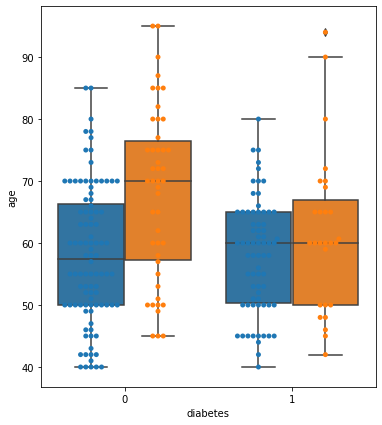

In [34]:
#AGE VS DIABETES
fig,ax = plt.subplots(figsize = (6,7))
sns.boxplot(data = temp_df, x = 'diabetes', y='age', hue="DEATH_EVENT")
sns.swarmplot(data = temp_df, x = 'diabetes', y='age', hue="DEATH_EVENT", dodge= True)
ax.get_legend().remove()
plt.show()

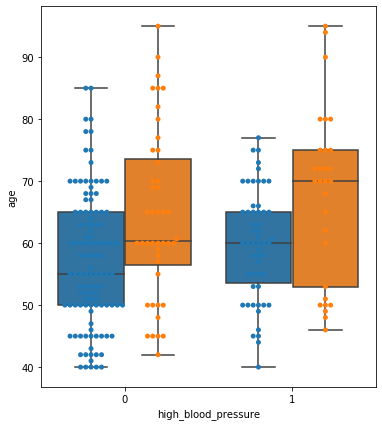

In [35]:
#AGE VS HIGH BLOOD PRESSURE
fig,ax = plt.subplots(figsize = (6,7))
sns.boxplot(data = temp_df, x = 'high_blood_pressure', y='age', hue="DEATH_EVENT")
sns.swarmplot(data = temp_df, x = 'high_blood_pressure', y='age', hue="DEATH_EVENT", dodge= True)
ax.get_legend().remove()
plt.show()

In [36]:
from scipy.stats import ttest_ind

dec_smokers = temp_df[(temp_df['DEATH_EVENT'] == 1)&(temp_df['smoking'] == 1 )]['age']
print("Total number of patients who deceased and were smokers",len(dec_smokers))
print("mean:", round(statistics.mean(dec_smokers), 3))
print("std:", round(statistics.stdev(dec_smokers),3))
print()
print("diabetes")

dec_smokers_diabetes = temp_df[(temp_df['DEATH_EVENT'] == 1)&(temp_df['smoking'] == 1) &(temp_df['diabetes'] == 1 )]['age']
print("Patients:",len(dec_smokers_diabetes))
print("mean:", round(statistics.mean(dec_smokers_diabetes),3))
print("std:", round(statistics.stdev(dec_smokers_diabetes),3))
print()
print("no diabetes")

dec_smokers_no_diabetes = temp_df[(temp_df['DEATH_EVENT'] == 1)&(temp_df['smoking'] == 1) &(temp_df['diabetes'] == 0 )]['age']
print("Patients:",len(dec_smokers_no_diabetes))
print("mean:", round(statistics.mean(dec_smokers_no_diabetes),3))
print("std:", round(statistics.stdev(dec_smokers_no_diabetes),3))

ttest_ind(dec_smokers_diabetes, dec_smokers_no_diabetes, equal_var = False)

Total number of patients who deceased and were smokers 23
mean: 66.739
std: 11.371

diabetes
Patients: 9
mean: 60.667
std: 7.632

no diabetes
Patients: 14
mean: 70.643
std: 11.875


Ttest_indResult(statistic=-2.452638841903679, pvalue=0.023013102837410978)

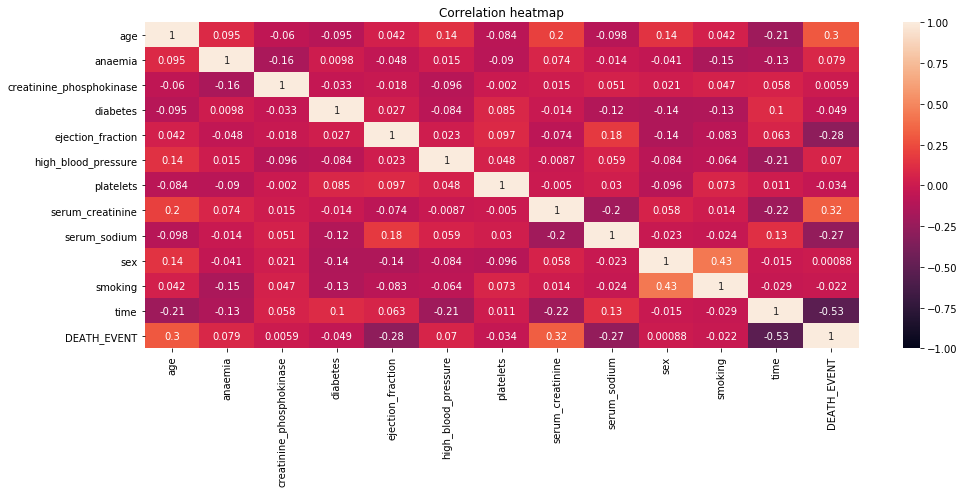

In [37]:
#CORRELATION MAP

plt.figure(figsize=(16,6))

heatmap = sns.heatmap(temp_df.corr(), vmin = -1, vmax=1, annot= True, fmt = '.2g')
heatmap.set_title('Correlation heatmap')
plt.show()

Variables: ['ejection_fraction', 'time']
Accuracy in the training set: 84.11
F1 score in the training set: 71.43
Recall in the training set: 68.57

Variables: ['age', 'ejection_fraction', 'time']
Accuracy in the training set: 85.78
F1 score in the training set: 75.32
Recall in the training set: 69.82



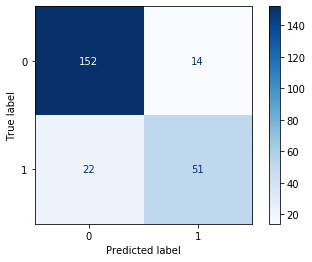

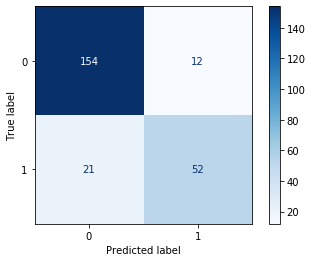

In [38]:
#First classifier: Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
import itertools


clf = GaussianNB()

#We train the model
#Based on the variables with a higher correlation against DEATH_EVENT, lets see if any of the combinations between them 
#improves our accuracy rate

selected_variables = ['age', 'ejection_fraction','serum_creatinine','time']
vars_=[]
f1_s = []
def var_performance(selected_variables):
    for i in range(len(selected_variables)):
        for j in list(itertools.combinations(selected_variables,i+1)):
            if len(j) == 1:
                continue
            temp_var = list(j)
            
#             print(temp_var)
#             print(statistics.mean(cv_results['test_accuracy']))
#             print(statistics.mean(cv_results['test_f1']))
#             print()
            #CROSS VALIDATION
            cv_results = cross_validate(clf, X_train[temp_var], y_train, cv = 10, scoring=('f1','accuracy','recall'))
            acc = statistics.mean(cv_results['test_accuracy'])*100
            f1 = statistics.mean(cv_results['test_f1'])*100
            recall = statistics.mean(cv_results['test_recall'])*100
            #TRAINING VALIDATION SPLIT
            clf.fit(X_train[temp_var], y_train)
            #acc = round(clf.score(X_train[temp_var], y_train)*100,2)
            if acc > 80 and f1 > 70:
                print("Variables:",temp_var)   
                print("Accuracy in the training set:",round(acc,2))
                print("F1 score in the training set:",round(f1,2))
                print("Recall in the training set:", round(recall,2))
                f1_s.append(f1)
                plot_confusion_matrix(clf, X_train[temp_var], y_train, cmap = 'Blues', values_format = '')
                #print("F1 score with the test set:",round(f1_score(clf.predict(X_train[temp_var]), y_train)*100,2))
                #f1_s.append(f1_score(clf.predict(X_train[temp_var]), y_train))
                vars_.append(temp_var)
                print()
    return vars_[f1_s.index(max(f1_s))]

selected_variables = var_performance(selected_variables)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 97)
print(X_train.shape, X_val.shape, X_test.shape)

(179, 12) (60, 12) (60, 12)


In [40]:
scaler = MinMaxScaler()
#We normalize the data in every set
#selected_variables = ['age', 'ejection_fraction', 'serum_creatinine', 'time']

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train[selected_variables]), columns = selected_variables)
X_val_norm = pd.DataFrame(scaler.transform(X_val[selected_variables]), columns = selected_variables)
X_test_norm = pd.DataFrame(scaler.transform(X_test[selected_variables]), columns = selected_variables)

['age', 'ejection_fraction', 'time']


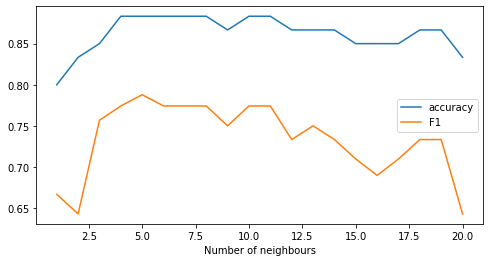

Accuracy: 88.0
F1 score: 79.0


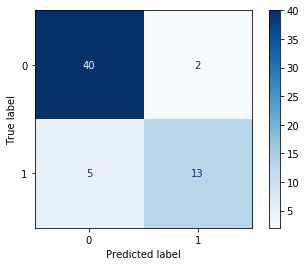

In [41]:
models = []; scores = []; f1 = []
fig,ax = plt.subplots(figsize = (8,4))

print(selected_variables)
for i in range(1,21):
    #We train our model 
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_norm, y_train)
    
    #We append the accuracy, the model, and the F1 score
    scores.append(neigh.score(X_val_norm, y_val))
    models.append(neigh)
    f1.append(f1_score(neigh.predict(X_val_norm), y_val))

plt.plot(np.arange(1,21,1), scores, label="accuracy")
plt.plot(np.arange(1,21,1), f1, label="F1")
plt.xlabel("Number of neighbours")
plt.legend()

plt.show()

#Lets choose the optimal K
model = models[f1.index(max(f1))]

print("Accuracy:",round(model.score(X_val_norm, y_val),2)*100 )
print("F1 score:", round(f1_score(model.predict(X_val_norm), y_val),2)*100)
plot_confusion_matrix(model, X_val_norm[selected_variables], y_val, cmap = 'Blues')

plt.show()

Accuracy: 83.3
F1 score: 76.0


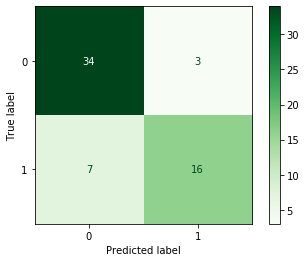

In [42]:
print("Accuracy:",round(model.score(X_test_norm, y_test),3)*100 )
print("F1 score:", round(f1_score(model.predict(X_test_norm), y_test),2)*100)
plot_confusion_matrix(model, X_test_norm[selected_variables], y_test, cmap = 'Greens')
plt.show()